## AEROPOLIS
#### Group 296881

In [ ]:
"""
SMALL SUMMARY --- --- --- REMOVE BEFORE SUBMISSION --- --- ---



One single notebook called “main.ipynb” with ALL the code used for the project.



The notebook must have the following characteristics:

    1. Text and code cells must alternate from start to finish. The text cell above must
       describe the contents of the code below and its output so that a reader can easily
       follow up on your implementation. 

    2. You must explain what you will do and why you chose to do so.

    3. You must explain the outputs of the cell (if any) with particular attention
       to describing figures such that a reader already knows what he is going to see.
"""

In [ ]:
"""
ALL TASKS --- --- --- REMOVE BEFORE SUBMISSION --- ---- ----

Data Preprocessing:
    Load and inspect the dataset.
    Handle missing values (e.g., impute or drop).
    Encode categorical features (e.g., one-hot encoding).

Model Selection and Training:
    Choose a machine learning algorithm (maybe Random Forest Regressor).
    Split the data into training and testing sets (80%/20% split).
    Train the model on the training set.

Model Evaluation:
    Evaluate the model using metrics such as Mean Absolute Error (MAE) and R-squared.
    Compare with baseline models (e.g., Linear Regression, Decision Trees).

Model Improvement:
    Perform hyperparameter tuning (e.g., using GridSearchCV).
    Optionally, explore other models like Gradient Boosting.

Feature Importance:
    Visualize feature importance from the Random Forest model.

Reporting:
    Write the project report, including:
        Introduction: Brief project overview.
        Methods: Approach, algorithm, features, and environment setup.
        Experimental Design: Baselines, metrics, and purpose of experiments.
        Results: Evaluation metrics, findings, and visualizations.
        Conclusions: Takeaways, unanswered questions, and next steps.

Code and Documentation:
    Provide clean, well-documented code.
    Include instructions for setting up the environment (e.g., requirements.txt or conda environment).
"""

## [SECTION 1] Introduction and EDA

To be added. Brief overview and aim. Lorem ipsum.

### Data Preparation

We sample our dataset for ease of calculation (especially in the early stages).
The earliest sample was 1.000 with frac = 0.001, then 10.000 with frac = 0.01.

In [1]:
# get the filepath from user and read the data

fileInput = None
if not fileInput:
    print("Please enter the path to the file: ")
    fileInput = input()

print(f"{fileInput}/aeropolis.csv")

Please enter the path to the file: 
/Your/File/Path/aeropolis.csv


In [1]:
import pandas as pd

df_or = pd.read_csv("/Users/alessiogiannotti/Downloads/aeropolis(2).csv")

# Sample a smaller version of the dataset
sample_size = 0.01

df_sm = df_or.sample(frac=sample_size, random_state=1) 
"""
Started with 10.000 entries instead of the original 1.000.000
"""

size = int(1000000 * sample_size)
# Save the above (smaller) dataset
df_sm.to_csv('aeropolis_sample.csv', index=False)

print(f"Sample of size {size} created.")

Sample of size 10000 created.


### Data Explanation

We take a close look at the dataset in its raw form, before cleaning or handling the data. Below are the first few entries, as well as statistics regarding size and characteristics of features.

In [2]:
# Data Structure

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

print("--- First Few Entries of the Dataset ---")
df.head()

--- First Few Entries of the Dataset ---


,Cargo_Capacity_kg,Air_Temperature_Celsius,Weather_Status,Package_Type,Vertical_Landing,Equipment_Cost,Market_Region,Flight_Duration_Minutes,Terrain_Type,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Climate_Zone,Quantum_Battery,Flight_Zone,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
0,4.270384,32.241410,Cloudy,Maize,Supported,36563.84,Local,False,NaN,5831.79,164.0,112.0,86.49,Arid,False,East,0.39,412.0,756.205234,651.62
1,5.120852,24.635445,Sunny,Cotton,Supported,29156.29,Local,False,Sandy,NaN,160.0,NaN,15.13,Arid,True,East,0.90,207.0,618.345249,1102.33
2,2.976017,16.292566,Cloudy,Barley,Unknown,10909.55,International,False,Sandy,4797.87,127.0,93.0,25.76,Temperate,False,North,0.54,NaN,548.243396,975.97
3,4.990381,NaN,Sunny,Soybean,NaN,48315.38,International,True,Clay,7764.89,160.0,80.0,165.06,Polar,True,West,0.10,354.0,447.768700,924.49
4,2.938318,21.689674,NaN,Soybean,Unknown,49506.24,Local,False,Clay,4979.04,136.0,93.0,55.70,Temperate,False,North,0.73,346.0,342.361072,909.98


What we notice first here is that the *Flight_Duration_Minutes* values are not integer of float values, but booleans. This gives us no information on the fkight duration so from this point onwards we will ignore this data.

In [3]:
# Dataset Statistics

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

dtypes_count = df.dtypes.value_counts()

# Dataset Statistics
print(f"{'Dataset Statistics':^34}")
print(f"{'-'*34}")
print(f"{'Number of Rows':<25}: {df.shape[0]}")
print(f"{'Number of Columns':<25}: {df.shape[1]}")

# Printing dtype counts
for dtype, count in dtypes_count.items():
    print(f"Number of Dtype {str(dtype):<9}: {count}")

print("\n\n--- Descriptive Statistics ---")
describe_df = df.describe().round(3)
describe_df

        Dataset Statistics        
----------------------------------
Number of Rows           : 1000000
Number of Columns        : 20
Number of Dtype float64  : 11
Number of Dtype object   : 9


--- Descriptive Statistics ---


,Cargo_Capacity_kg,Air_Temperature_Celsius,Equipment_Cost,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
count,899767.000,900236.000,900197.000,900344.000,900273.000,900036.000,899602.000,900189.000,899779.000,900212.000,899614.000
mean,4.650,27.502,29987.481,4999.072,149.995,104.483,50.093,0.500,299.316,550.079,999.719
std,1.696,7.221,11548.037,1500.070,12.255,25.945,50.073,0.289,115.500,259.809,199.873
min,-1.148,15.000,10000.140,-2323.700,95.000,60.000,0.000,0.000,100.000,100.001,-133.070
25%,3.419,21.253,19972.210,3987.088,142.000,82.000,14.450,0.250,199.000,325.136,864.782
50%,4.652,27.505,29986.650,4997.685,150.000,104.000,34.730,0.500,299.000,550.349,999.750
75%,5.879,33.752,39990.970,6011.532,158.000,127.000,69.428,0.750,399.000,774.780,1134.480
max,9.963,40.000,49999.990,13104.200,213.000,149.000,716.380,1.000,499.000,999.998,1999.670


Here we notice negative values for "*Cargo_Capacity_kg*" and "*Water_Usage_liters*" which can only be attributed to computational generation errors, so we will later ignore those values in calculations.

## EDA - Exploratory Data Analysis
### Understanding Missing Values (In-Depth Analysis)

We start by checking for missing values. Of all 1.000.000 entries around 100.000 of each category is missing. This is nearly 10% of all data.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

# Calculate missing and non-missing values
missing_values = df.isnull().sum()
non_missing_values = df.notnull().sum()
missing_percentage = ((missing_values / len(df)) * 100).round(2)

dtypes = df.dtypes

missing_data = pd.DataFrame({
    'Non_Null_Values': non_missing_values,
    'Null_Values': missing_values,
    '%_Missing': missing_percentage,
    'Data_Type': dtypes.values
}).sort_values(by='Null_Values', ascending=False)

# Output
missing_data

,Non_Null_Values,Null_Values,%_Missing,Data_Type
Package_Type,899579,100421,10.04,object
Cleaning_Liquid_Usage_liters,899602,100398,10.04,float64
Route_Optimization_Per_Second,899614,100386,10.04,float64
Cargo_Capacity_kg,899767,100233,10.02,float64
Vertical_Max_Speed,899779,100221,10.02,float64
Climate_Zone,899823,100177,10.02,object
Weather_Status,899826,100174,10.02,object
Flight_Zone,899843,100157,10.02,object
Market_Region,899887,100113,10.01,object
Quantum_Battery,900007,99993,10.00,object


### Missing Values Visualized

Now we visualize the missing data using several methods to gain a better understanding and detect any unusual patterns.

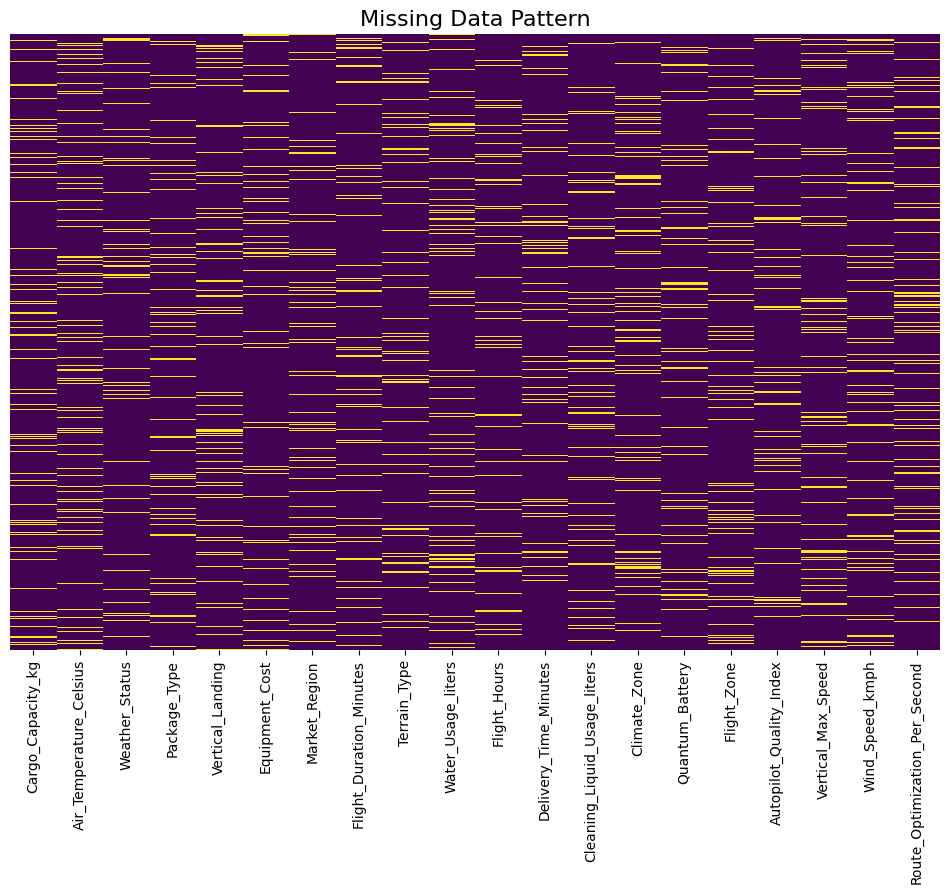

In [ ]:
# Visualize missing data patterns

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern', fontsize=16)
plt.show()

Further Visaualization using missingno

<Axes: >

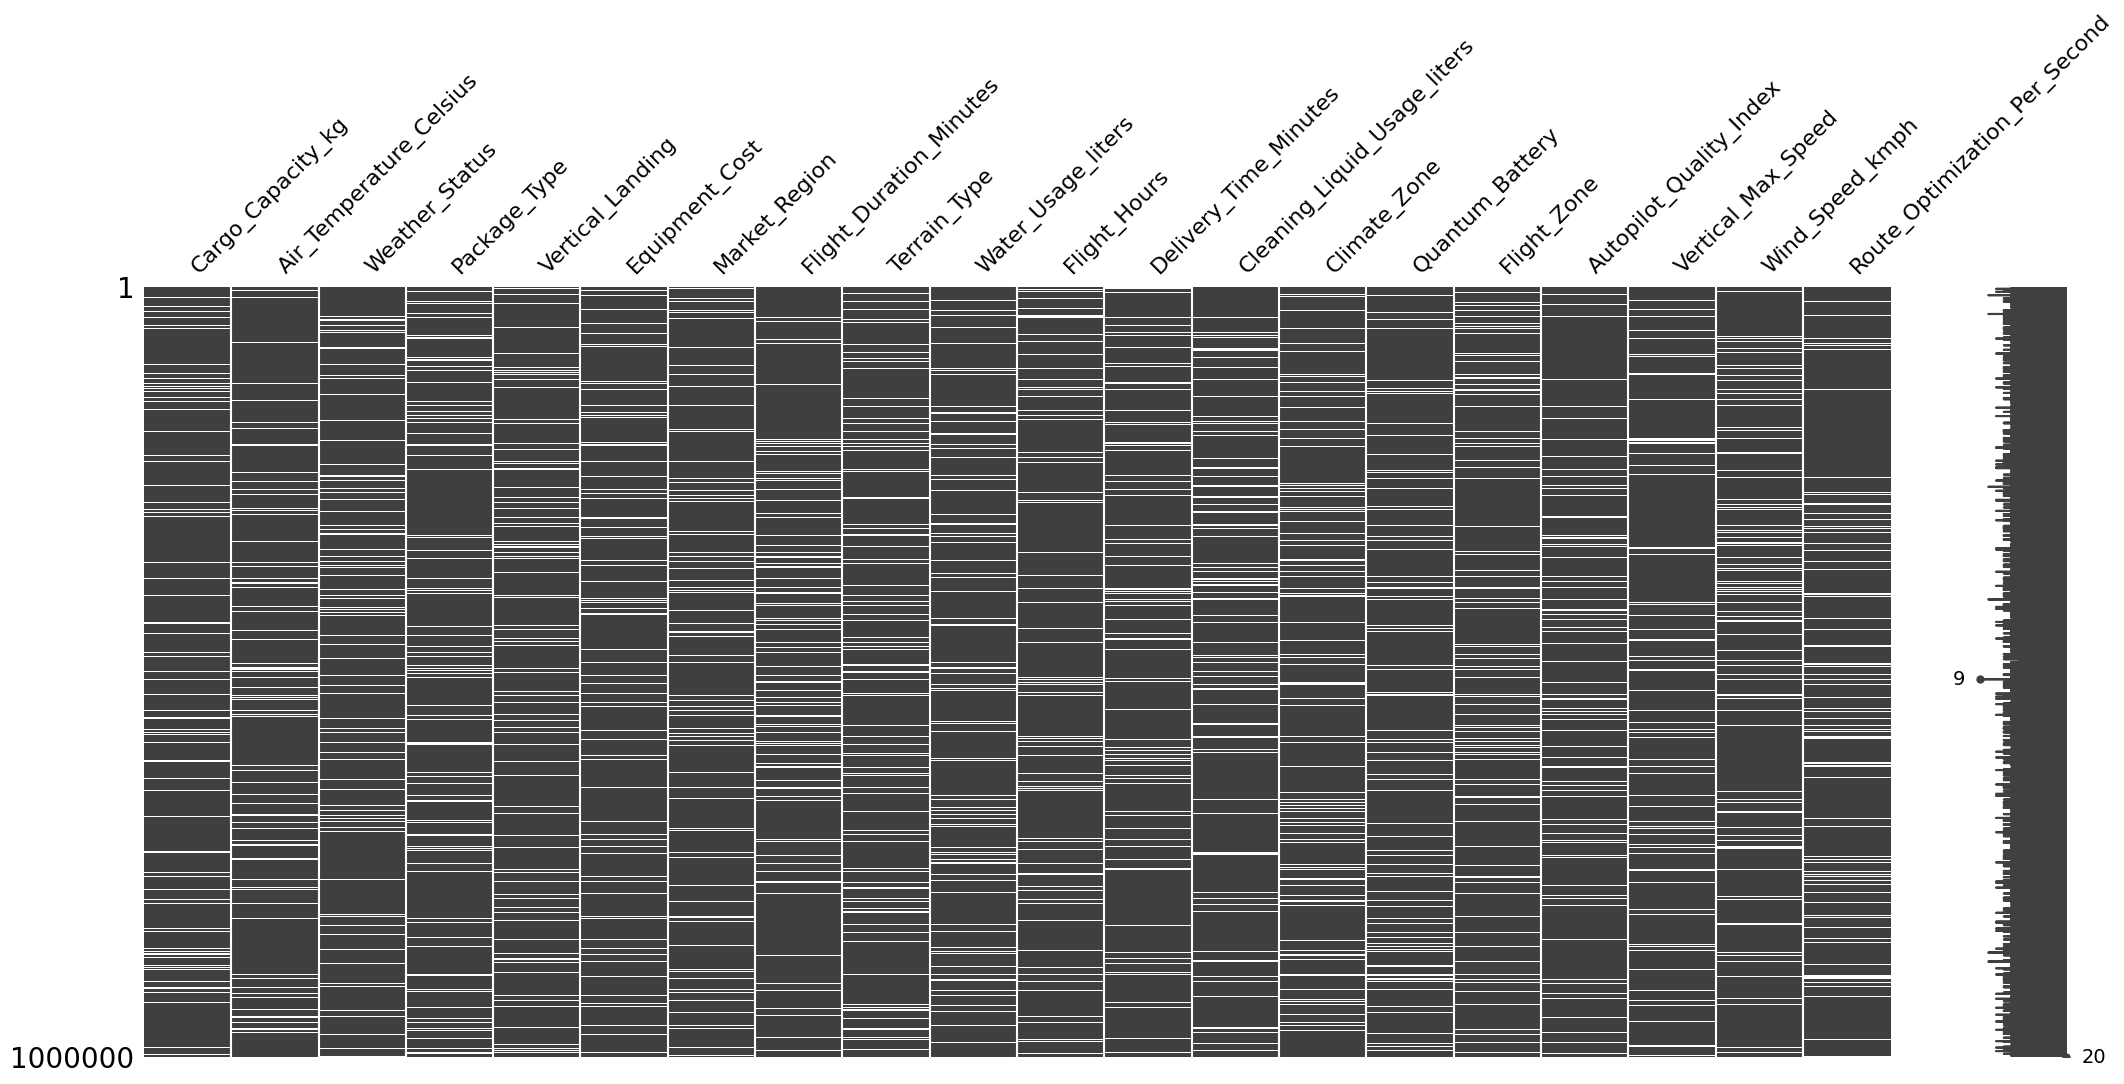

In [ ]:
import missingno as msno

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

msno.matrix(df)

To our best understanding, visually, the missing data seems to be randomly distributed. In oher words, no two (or more) columns seem to hold a similar pattern at first sight.

We then move on to computation to not rely on intuition alone, and further show that it in fact is, random.

In [ ]:
"""
NEW TASKS --- --- --- REMOVE BEFORE SUBMISSION --- ---- ----

1. Analyze Missingness

Check for Patterns: Use visualizations (e.g., heatmaps, bar plots) to see if missing values in Cargo_Capacity_kg correlate with specific features (e.g., Weather_Status, Flight_Zone).
Types of Missingness:
MCAR: Data is missing randomly; removal or imputation is acceptable.
MAR: Data is missing due to other observed variables; more advanced imputation may be needed.
MNAR: Missingness depends on the missing variable itself; investigate reasons for missing data.
2. Use Advanced Imputation Methods

KNN Imputation: Replaces missing values with the nearest neighbors’ values. Works well for numerical and categorical data.
Multivariate Imputation (MICE): Uses regression models to predict missing values based on other features.
Model-Based Imputation: Train a predictive model (e.g., regression, decision trees) to fill in missing values.
3. Evaluate Impact of Missing Data

Run your analysis/model with and without the missing rows to understand how much they influence the results.
Use cross-validation to compare model performance with imputed vs. dropped data.
4. Document Your Decisions

Keep track of what method you used and why. Transparency ensures reproducibility and helps interpret results.
Usual Approach to Decide Between Dropping or Replacing
Quantify Missing Data:
If <5% of rows are missing, dropping them might be fine.
If >30%, imputation or deeper analysis is typically better.
Assess Feature Importance:
If Cargo_Capacity_kg is critical (e.g., target variable), invest more effort in imputing values meaningfully.
If the feature with missing data is not important, you might drop it altogether.
Consider Dataset Size:
In small datasets, imputation is generally better than dropping rows to avoid losing too much data.
Application to Aeropolis Dataset
Given the context of autonomous drones and the importance of optimizing cargo capacity:

Step 1: Analyze correlations between Cargo_Capacity_kg and key features such as Weather_Status, Flight_Duration_Minutes, Terrain_Type, and Market_Region to check if missingness is random.
Step 2: For numerical features, try advanced imputation methods (e.g., KNN or MICE). For categorical ones, explore mode or probability-based imputation.
Step 3: Use machine learning to predict missing Cargo_Capacity_kg values based on other features if correlations are strong.
This structured approach will help you better handle missing data and ensure the reliability of your insights and models.
"""

### Comments on Missing Values and Relationships Between Features

For all of the features, even with p-values well above common significance thresholds (0.05, 0.01, 0.001), based on the tests we've run, there's no statistical evidence to suggest that these features are correlated with missing values in Cargo_Capacity_kg. 

Choosing a lower threshold (e.g., 0.0001) would be counterproductive since it would only reduce the number of features you consider significant. Choosing a higher threshold for p is intuitively unnecessary as we would be willing to accept a very high flase-positive rate.

Values in Cargo_Capacity_kg appear to be *"missing at random"* with respect to the other variables. This suggests that the missingness is not influenced by specific factors in the dataset, and thus imputation or other techniques can be used without introducing significant bias.

We believe this close-to-none correlation is most likely caused by random generation of the features.

In [5]:
p_val = 0.05 # can be altered to see that the outputs do not change

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['float', 'int']).columns

We defined categorical and numerical features above, and seperately handle them with chi-square and t-tests respectively. 

After this, we visualize them to investigate the pattern the missing values follow. We see that it's the same pattern as the available data and thus decide the missingness is at random. We further prove this by performing Little's MCAR (Missing Completely At Random) Test and conclude that the data can be handled according to MCAR principles.

#### Categorical Features
In relation to the missing Cargo_Capacity_kg values.

In [39]:
from scipy.stats import chi2_contingency
import pandas as pd

df = df_sm
# Easily switch between the original dataset and saple (df_sm) as needed

# Threshold for significance
p_val = 0.05  # Can be altered to observe sensitivity of results

# Header for results
print(f"{'Chi-Squared Test Results':^80}")
print(f"{'-'*80}")

# Iterate over categorical features
for col in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df[col], df['Cargo_Capacity_kg'].isnull())
    
    # Perform Chi-Squared Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display results
    print(f"{col}: p-value = {p:.4f}")
    if p < p_val:
        print(f"  -> Missingness in 'Cargo_Capacity_kg' is related to '{col}'.\n")
    else:
        print(f"  -> No significant relationship between missingness in 'Cargo_Capacity_kg' and '{col}'.\n")


                            Chi-Squared Test Results                            
--------------------------------------------------------------------------------
Weather_Status: p-value = 0.4382
  -> No significant relationship between missingness in 'Cargo_Capacity_kg' and 'Weather_Status'.

Package_Type: p-value = 0.5738
  -> No significant relationship between missingness in 'Cargo_Capacity_kg' and 'Package_Type'.

Vertical_Landing: p-value = 0.2368
  -> No significant relationship between missingness in 'Cargo_Capacity_kg' and 'Vertical_Landing'.

Market_Region: p-value = 0.1081
  -> No significant relationship between missingness in 'Cargo_Capacity_kg' and 'Market_Region'.

Flight_Duration_Minutes: p-value = 1.0000
  -> No significant relationship between missingness in 'Cargo_Capacity_kg' and 'Flight_Duration_Minutes'.

Terrain_Type: p-value = 0.9953
  -> No significant relationship between missingness in 'Cargo_Capacity_kg' and 'Terrain_Type'.

Climate_Zone: p-value = 0.2878
  -

When visualized, we see that the missing values follow the pattern of the available data.

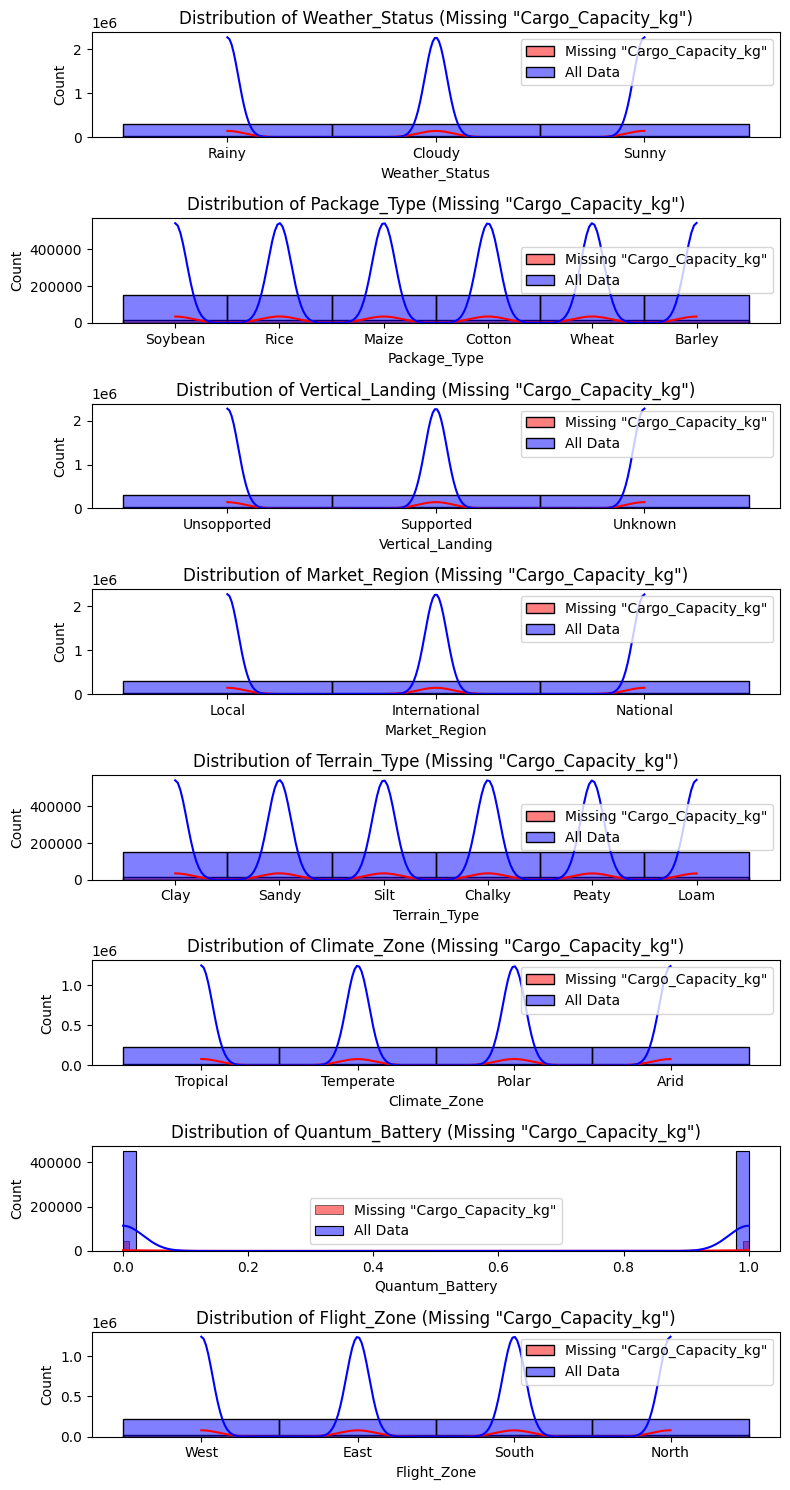

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

missing_values_rows = df[df['Cargo_Capacity_kg'].isnull()]

selected_columns = ['Weather_Status', 'Package_Type', 'Vertical_Landing', 'Market_Region', 
                    'Terrain_Type', 'Climate_Zone', 'Quantum_Battery', 'Flight_Zone']

fig, axes = plt.subplots(len(selected_columns), 1, figsize=(8, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_values_rows, x=col, ax=axes[i], kde=True, color='red', label='Missing "Cargo_Capacity_kg"', bins=111)
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='blue', label='All Data')
    axes[i].set_title(f'Distribution of {col} (Missing "Cargo_Capacity_kg")')
    axes[i].legend()
    #axes[i].set_yscale('log')

plt.tight_layout()
plt.show()


#### Numerical Features
In relation to the missing Cargo_Capacity_kg values.

In [ ]:
from scipy.stats import ttest_ind

df = df_sm
# Easily switch between the original dataset and saple (df_sm) as needed

missing_cargo = df[df['Cargo_Capacity_kg'].isnull()]
non_missing_cargo = df[~df['Cargo_Capacity_kg'].isnull()]

print(f"{'P-Value Statistics after T-Tests':^99}")
print(f"{'-'*105}")
for col in numerical_features:
    t_stat, p = ttest_ind(missing_cargo[col].dropna(), non_missing_cargo[col].dropna(), equal_var=False)
    print(f"{col} - p-value: {p:.4f}")
    if p < p_val:
        print(f"  -> Missingness in Cargo_Capacity_kg is related to {col}.\n")
    else:
        print(f"  -> No significant relationship between missingness in Cargo_Capacity_kg and {col}.\n")


                                 P-Value Statistics after T-Tests                                  
---------------------------------------------------------------------------------------------------------
Cargo_Capacity_kg - p-value: nan
  -> No significant relationship between missingness in Cargo_Capacity_kg and Cargo_Capacity_kg.

Air_Temperature_Celsius - p-value: 0.5950
  -> No significant relationship between missingness in Cargo_Capacity_kg and Air_Temperature_Celsius.

Equipment_Cost - p-value: 0.7637
  -> No significant relationship between missingness in Cargo_Capacity_kg and Equipment_Cost.

Water_Usage_liters - p-value: 0.3239
  -> No significant relationship between missingness in Cargo_Capacity_kg and Water_Usage_liters.

Flight_Hours - p-value: 0.4315
  -> No significant relationship between missingness in Cargo_Capacity_kg and Flight_Hours.

Delivery_Time_Minutes - p-value: 0.0609
  -> No significant relationship between missingness in Cargo_Capacity_kg and Delivery_Ti

When visualized, we see that the missing values follow the pattern of the available data.

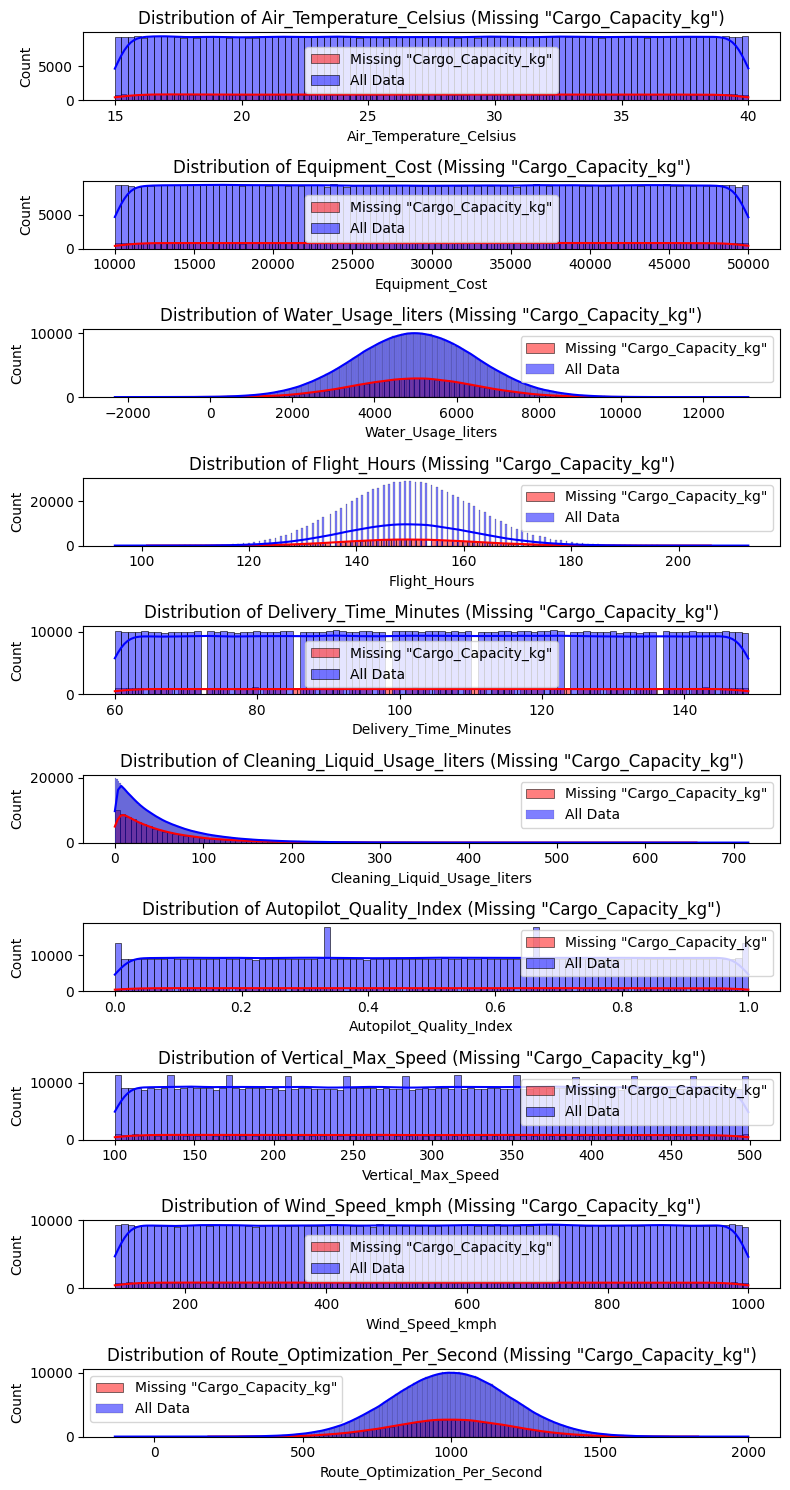

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_or
# Easily switch between the original dataset and saple (df_sm) as needed

missing_values_rows = df[df['Cargo_Capacity_kg'].isnull()]

selected_columns = ['Air_Temperature_Celsius', 'Equipment_Cost', 'Water_Usage_liters', 'Flight_Hours', 
                    'Delivery_Time_Minutes', 'Cleaning_Liquid_Usage_liters', 'Autopilot_Quality_Index', 
                    'Vertical_Max_Speed', 'Wind_Speed_kmph', 'Route_Optimization_Per_Second']

fig, axes = plt.subplots(len(selected_columns), 1, figsize=(8, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_values_rows, x=col, ax=axes[i], kde=True, color='red', label='Missing "Cargo_Capacity_kg"', bins=111)
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='blue', label='All Data')
    axes[i].set_title(f'Distribution of {col} (Missing "Cargo_Capacity_kg")')
    axes[i].legend()
    #axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

Above, we investigated all features in relation to Cargo_Capacity_kg.

Here below is the complete analysis for all columns (features) in relation to each other.

### Little's MCAR Test

The null hypothesis is that missingness is not related to any other variables.

We use the *Chi-Squared Test.* We calculate the p-value for each feature’s missingness pattern with respect to the others. If the p-value is above 0.05, we do not reject the null hypothesis, and the missing data is consistent with MCAR.

In [46]:
import pandas as pd
from pyampute.exploration.mcar_statistical_tests import MCARTest

df = df_or  

# Select categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
df_numeric = df.select_dtypes(include=['float', 'int'])

# Combine numeric and encoded categorical columns
data_mcar = pd.concat([df_numeric, df_encoded], axis=1)

# Perform Little's MCAR Test
mt = MCARTest(method="little")

try:
    test_result = mt.little_mcar_test(data_mcar)
    print(f"{"Little's MCAR Test:":>20}")
    print(f"{'-'*42}")
    print(test_result, "\n")
    
    # Interpretation of result
    if test_result > 0.05:
        print("Data is MCAR (Missing Completely at Random)")
    else:
        print("Data is NOT MCAR (Missing Completely at Random)")
except Exception as e:
    print(f"Error during Little's MCAR test: {e}")


ModuleNotFoundError: No module named 'pyampute'

Below, we investigate each  feature (column)'s missing data in relation to all other features (columns). We find some local relations between data after testing.

The key difference is that while Little's test examines missingness across the whole dataset, the Chi-square and T-tests look at specific (and local) relationships between missingness related to other features.

#### p-values of Each Feature's Missing Values in Relation to Other Features

In [6]:
import numpy as np
from scipy.stats import chi2, ttest_ind, chi2_contingency
from collections import defaultdict

df = df_or

# Initialize dictionaries and lists to store p-values
all_p_values = []  # to store all p-values
significant_p_values = defaultdict(list)  # store significant results as a list of dictionaries

print("SCROLL to view full results.")

# Iterate through columns for missingness analysis
for target_col in df.columns:
    print(f"\n--- Analyzing Missingness for {target_col} ---")
    print(f"{'-'*62}\n")
    missing_target = df[df[target_col].isnull()]
    non_missing_target = df[df[target_col].notnull()]

    # Analyze categorical features
    for col in categorical_features:
        if col != target_col:
            contingency_table = pd.crosstab(df[col], df[target_col].isnull())
            chi2_stat, p, _, _ = chi2_contingency(contingency_table)
            print(f"(Categorical) - {col:<30} p-value: {p:.4f}")
            all_p_values.append(p)
            if p < 0.05:  # Significant
                significant_p_values[target_col].append({
                    "related_column": col,
                    "target_type": "categorical" if target_col in categorical_features else "numerical",
                    "related_type": "categorical",
                    "p_value": p
                })

    # Analyze numerical features
    for col in numerical_features:
        if col != target_col:
            t_stat, p = ttest_ind(
                missing_target[col].dropna(),
                non_missing_target[col].dropna(),
                equal_var=False
            )
            print(f"(Numerical)   - {col:<30} p-value: {p:.4f}")
            all_p_values.append(p)
            if p < 0.05:  # Significant
                significant_p_values[target_col].append({
                    "related_column": col,
                    "target_type": "numerical" if target_col in numerical_features else "categorical",
                    "related_type": "numerical",
                    "p_value": p
                })


SCROLL to view full results.

--- Analyzing Missingness for Cargo_Capacity_kg ---
--------------------------------------------------------------

(Categorical) - Weather_Status                 p-value: 0.7645
(Categorical) - Package_Type                   p-value: 0.5432
(Categorical) - Vertical_Landing               p-value: 0.2717
(Categorical) - Market_Region                  p-value: 0.7661
(Categorical) - Flight_Duration_Minutes        p-value: 0.2718
(Categorical) - Terrain_Type                   p-value: 0.1915
(Categorical) - Climate_Zone                   p-value: 0.2848
(Categorical) - Quantum_Battery                p-value: 0.5026
(Categorical) - Flight_Zone                    p-value: 0.3229
(Numerical)   - Air_Temperature_Celsius        p-value: 0.1690
(Numerical)   - Equipment_Cost                 p-value: 0.0317
(Numerical)   - Water_Usage_liters             p-value: 0.1512
(Numerical)   - Flight_Hours                   p-value: 0.6946
(Numerical)   - Delivery_Time_Minut

#### p-values of Some Features' Missing Values in Relation to Other Features Where p < 0.05 

This indicates a non-MCAR relationship, but a local one rather than a greater one across the dataset. This allows us to explore a higher-level way to impute these specific values, utilizing the relationships they showcase.

In [7]:
#grouping relationships by type
ordered_relationships = defaultdict(list)

#organizing relationships by type
for target_col, relationships in significant_p_values.items():
    for relationship in relationships:
        relationship_type = f"{relationship['target_type']}-{relationship['related_type']}"
        ordered_relationships[relationship_type].append({
            "target_column": target_col,
            "related_column": relationship['related_column'],
            "p_value": relationship['p_value']
        })

#printing significant p-values
print("\n--- Significant P-Values (p < 0.05) ---")
print(f"{'-'*80}\n")
for relationship_type, relations in ordered_relationships.items():
    print(f"--- {relationship_type.upper()} ---\n")
    for relation in relations:
        print(f"{relation['target_column']:<30} - {relation['related_column']:<30} p-value: {relation['p_value']:.4f}")
    print(f"\n{'-'*80}\n")


--- Significant P-Values (p < 0.05) ---
--------------------------------------------------------------------------------

--- NUMERICAL-NUMERICAL ---

Cargo_Capacity_kg              - Equipment_Cost                 p-value: 0.0317
Air_Temperature_Celsius        - Cleaning_Liquid_Usage_liters   p-value: 0.0474
Equipment_Cost                 - Delivery_Time_Minutes          p-value: 0.0392
Equipment_Cost                 - Route_Optimization_Per_Second  p-value: 0.0195
Autopilot_Quality_Index        - Air_Temperature_Celsius        p-value: 0.0324
Wind_Speed_kmph                - Flight_Hours                   p-value: 0.0031

--------------------------------------------------------------------------------

--- NUMERICAL-CATEGORICAL ---

Air_Temperature_Celsius        - Market_Region                  p-value: 0.0006
Flight_Hours                   - Climate_Zone                   p-value: 0.0429
Delivery_Time_Minutes          - Flight_Duration_Minutes        p-value: 0.0364
Cleaning_Liqui

#### Visual Representation of (Locally) Non-MCAR Values

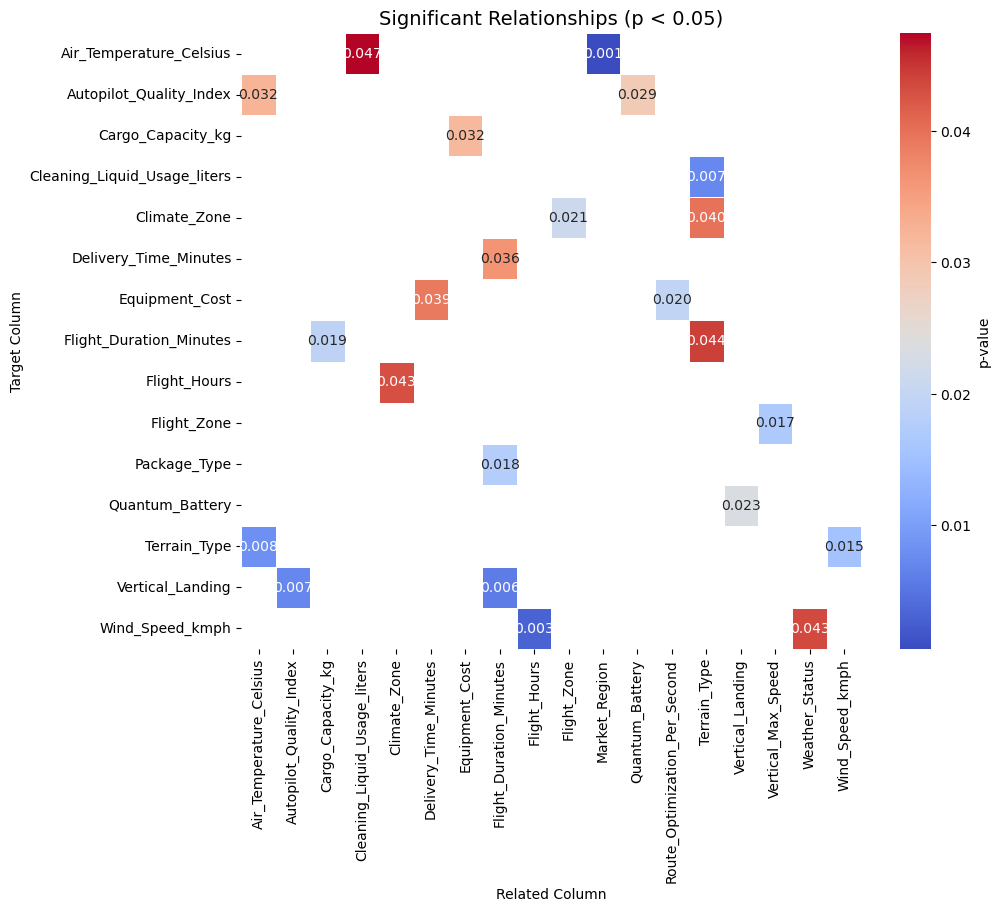

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert significant_p_values to a DataFrame for the heatmap
heatmap_data = []
for target_col, relationships in significant_p_values.items():
    for relationship in relationships:
        heatmap_data.append([
            target_col,
            relationship["related_column"],
            relationship["p_value"],
            f"{relationship['target_type']}-{relationship['related_type']}"
        ])

# Create a DataFrame for heatmap
df_heatmap = pd.DataFrame(heatmap_data, columns=["Column 1", "Column 2", "p-value", "Relationship Type"])

# Pivot table for heatmap
pivot_table = df_heatmap.pivot(index="Column 1", columns="Column 2", values="p-value")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "p-value"},
)

plt.title("Significant Relationships (p < 0.05)", fontsize=14)
plt.xlabel("Related Column")
plt.ylabel("Target Column")
plt.show()


#### Proof of Overall MCAR Nature

Even with separately handled p-values, when brought together to combine, prove a larger-than-0.05 p-value, resulting in a MCAR relationship in missing data.

In [9]:
# Fisher's method: Calculate the combined p-value
chi_square_stat = -2 * np.sum(np.log(all_p_values))  # Calculate the test statistic
df_combined = 2 * len(all_p_values)  # Degrees of freedom

# Combined p-value using chi-square distribution
combined_p_value = 1 - chi2.cdf(chi_square_stat, df_combined)

# Print the combined p-value
print(f"Combined p-value using Fisher's method: {combined_p_value:.4f}")

if combined_p_value > 0.05:
    print("Data is MCAR (Missing Completely at Random)")
else:
    print("Data is NOT MCAR (Missing Completely at Random)")

Combined p-value using Fisher's method: 0.2276
Data is MCAR (Missing Completely at Random)


### Handling Missing Values

In [10]:
#Imputation for non-MCAR Relationships
"""To address the local non-MCAR relationships revealed by the significant p-values, 
we chose higher-level imputation methods that exploit the relationships between features.

The imputation strategy changes according to the relationship type:

-Numerical-Numerical = we're using regression-based imputation to predict missing
                        values in one column based on the related numerical column

-Categorical-Categorical = we're using mode-based imputation conditioned on the related column

-Categorical-Numerical and vice versa = we're using group-based mean or regression fro
                                        numerical columns, and mode for categorical columns

"""

#Numerical-Numerical

from sklearn.linear_model import LinearRegression
import numpy as np

def impute_numerical_with_regression(df, target_col, predictor_col):
    # Separate rows with and without missing values in the target column
    complete_data = df[df[target_col].notnull()]
    missing_data = df[df[target_col].isnull()]

    # Check if the predictor column contains NaNs
    if df[predictor_col].isnull().any():
        print(f"NaN values found in {predictor_col}. Dropping rows with NaN in the predictor column.")
        complete_data = complete_data[complete_data[predictor_col].notnull()]
        missing_data = missing_data[missing_data[predictor_col].notnull()]

    # Ensure there is enough data to fit the regression model
    if complete_data.shape[0] < 2:
        print(f"Not enough complete data to impute {target_col}. Skipping.")
        return

    # Ensure there are samples to predict in missing_data
    if missing_data.shape[0] == 0:
        print(f"No valid samples to predict for {target_col} using {predictor_col}. Skipping.")
        return

    # Fit regression model on complete data
    reg = LinearRegression()
    reg.fit(complete_data[[predictor_col]], complete_data[target_col])

    # Predict and fill missing values
    predicted_values = reg.predict(missing_data[[predictor_col]])
    df.loc[missing_data.index, target_col] = predicted_values



#Categorical-Categorical

import numpy as np

# Impute categorical column based on the related column
def impute_categorical(df, target_col, related_col):
    # Group by the related column and fill missing values with the mode within each group
    for group in df[related_col].dropna().unique():
        mode_value = df[df[related_col] == group][target_col].mode()
        if not mode_value.empty:
            df.loc[np.logical_and(df[related_col] == group, df[target_col].isnull()), target_col] = mode_value.iloc[0]

#Categorical-Numerical and Numerical-Categorical

import numpy as np

def impute_numerical_with_group_mean(df, target_col, related_col):
    # Group by the related column and calculate means
    group_means = df.groupby(related_col)[target_col].mean()

    # Impute missing values with the group-specific mean
    for group in group_means.index:
        df.loc[np.logical_and(df[related_col] == group, df[target_col].isnull()), target_col] = group_means[group]

import numpy as np

def impute_categorical_from_numerical(df, target_col, related_col, bins=5):
    # Create bins for the numerical column
    df['binned_related'] = pd.cut(df[related_col], bins=bins, labels=False)

    # Impute categorical values based on the mode of each bin
    for bin_value in df['binned_related'].dropna().unique():
        mode_value = df[df['binned_related'] == bin_value][target_col].mode()
        if not mode_value.empty:
            df.loc[np.logical_and(df['binned_related'] == bin_value, df[target_col].isnull()), target_col] = mode_value.iloc[0]

    # Drop the temporary binned column
    df.drop('binned_related', axis=1, inplace=True)

#Imputation Based on relationship

for relationship_type, relations in ordered_relationships.items():
    for relation in relations:
        target_col = relation["target_column"]
        related_col = relation["related_column"]
        p_value = relation["p_value"]

        if relationship_type == "categorical-categorical":
            print(f"Imputing {target_col} based on {related_col} (Categorical-Categorical)...")
            impute_categorical(df, target_col, related_col)
        
        elif relationship_type == "numerical-numerical":
            print(f"Imputing {target_col} based on {related_col} (Numerical-Numerical)...")
            impute_numerical_with_regression(df, target_col, related_col)
        
        elif relationship_type == "categorical-numerical":
            print(f"Imputing {target_col} based on {related_col} (Categorical-Numerical)...")
            if target_col in numerical_features:
                impute_numerical_with_group_mean(df, target_col, related_col)
            else:
                impute_categorical_from_numerical(df, target_col, related_col)
        
        elif relationship_type == "numerical-categorical":
            print(f"Imputing {target_col} based on {related_col} (Numerical-Categorical)...")
            if target_col in categorical_features:
                impute_categorical(df, target_col, related_col)
            else:
                impute_numerical_with_group_mean(df, target_col, related_col)

print("Imputation for non-MCAR relationships has completed")

Imputing Cargo_Capacity_kg based on Equipment_Cost (Numerical-Numerical)...
NaN values found in Equipment_Cost. Dropping rows with NaN in the predictor column.
Imputing Air_Temperature_Celsius based on Cleaning_Liquid_Usage_liters (Numerical-Numerical)...
NaN values found in Cleaning_Liquid_Usage_liters. Dropping rows with NaN in the predictor column.
Imputing Equipment_Cost based on Delivery_Time_Minutes (Numerical-Numerical)...
NaN values found in Delivery_Time_Minutes. Dropping rows with NaN in the predictor column.
Imputing Equipment_Cost based on Route_Optimization_Per_Second (Numerical-Numerical)...
NaN values found in Route_Optimization_Per_Second. Dropping rows with NaN in the predictor column.
Imputing Autopilot_Quality_Index based on Air_Temperature_Celsius (Numerical-Numerical)...
NaN values found in Air_Temperature_Celsius. Dropping rows with NaN in the predictor column.
Imputing Wind_Speed_kmph based on Flight_Hours (Numerical-Numerical)...
NaN values found in Flight_Hours

In [11]:
#Imputation for MCAR Relationships
"""For the values which do not show non-MCAR relationships we used simpler imputation methods (median for numerical values,
mode for categorical values), since such approach wouldn't introduce bias"""
from sklearn.impute import SimpleImputer

# Replace NaN values with the median for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Mode for categorical values
categorical_features = df.select_dtypes(include=['object', 'category']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

print("Imputation executed")

# Drop the column 'Flight_Duration_Minutes'
df = df.drop(columns=['Flight_Duration_Minutes'])

print("Column Dropped")

Imputation executed
Column Dropped


In [13]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('Cargo_Capacity_kg', axis=1)
y = df_encoded['Cargo_Capacity_kg']

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Ensure no missing values before proceeding
X = X.fillna(0)  # Example: Replace missing values with 0
y = y.fillna(y.mean())  # Replace missing values in target with mean

"""# Compute mutual information scores
try:
    mi_scores = mutual_info_regression(X, y, random_state=42)
    # Convert scores to pandas Series for easier handling
    mi_scores_series = pd.Series(mi_scores, index=X.columns)
    mi_scores_series.sort_values(ascending=False, inplace=True)

    # Print and plot Mutual Information Scores
    print("Mutual Information Scores:")
    print(mi_scores_series)
    
    plt.figure(figsize=(12, 6))
    mi_scores_series.plot(kind='bar', color='skyblue')
    plt.title("Mutual Information Scores")
    plt.ylabel("Mutual Information")
    plt.xlabel("Features")
    plt.show()

except Exception as e:
    print("Error computing mutual information:", e)
"""

Missing values in X: 0
Missing values in y: 0


'# Compute mutual information scores\ntry:\n    mi_scores = mutual_info_regression(X, y, random_state=42)\n    # Convert scores to pandas Series for easier handling\n    mi_scores_series = pd.Series(mi_scores, index=X.columns)\n    mi_scores_series.sort_values(ascending=False, inplace=True)\n\n    # Print and plot Mutual Information Scores\n    print("Mutual Information Scores:")\n    print(mi_scores_series)\n    \n    plt.figure(figsize=(12, 6))\n    mi_scores_series.plot(kind=\'bar\', color=\'skyblue\')\n    plt.title("Mutual Information Scores")\n    plt.ylabel("Mutual Information")\n    plt.xlabel("Features")\n    plt.show()\n\nexcept Exception as e:\n    print("Error computing mutual information:", e)\n'

In [ ]:
# Filter features with significant mutual information scores
    important_features = mi_scores_series[mi_scores_series > 0.05].index
    print("Selected Important Features:", important_features)


Selected Important Features: Index(['Wind_Speed_kmph', 'Quantum_Battery_True'], dtype='object')


In [21]:
print(X.describe())  # Inspect distributions of features
print(X.isnull().sum())

# Function to identify outliers for all numerical features
def detect_outliers_iqr(df, columns=None):
    """
    Identify outliers in all numerical columns using the IQR method.

    Parameters:
    - df: DataFrame to analyze
    - columns: List of columns to check for outliers. Defaults to all numerical columns.

    Returns:
    - outliers_dict: A dictionary with column names as keys and DataFrames of outliers as values.
    """
    if columns is None:
        columns = df.select_dtypes(include=['float', 'int']).columns  # Default to numerical columns

    outliers_dict = {}  # To store outliers for each column

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers

        print(f"Column: {col}")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
        print(f"Number of outliers: {outliers.shape[0]}")
        print("-" * 40)

    return outliers_dict

# Apply the function to detect outliers
outliers_dict = detect_outliers_iqr(X)


       Air_Temperature_Celsius  Equipment_Cost  Water_Usage_liters  \
count           1000000.000000  1000000.000000      1000000.000000   
mean                 27.502431    29987.445892         4998.934172   
std                   6.850905    10956.628711         1423.362889   
min                  15.000041    10000.140000        -2323.700000   
25%                  21.940638    21076.625000         4113.800000   
50%                  27.498997    29987.385266         4997.685000   
75%                  33.062384    38882.385000         5883.702500   
max                  39.999997    49999.990000        13104.200000   

         Flight_Hours  Delivery_Time_Minutes  Cleaning_Liquid_Usage_liters  \
count  1000000.000000         1000000.000000                1000000.000000   
mean       149.995018             104.480689                     49.991893   
std         11.627418              24.613850                     47.503737   
min         95.000000              60.000000             


--- Target Variable Summary ---
count    1000000.000000
mean           4.649775
std            1.609120
min           -1.147613
25%            3.573106
50%            4.649782
75%            5.726067
max            9.963372
Name: Cargo_Capacity_kg, dtype: float64

Missing values in the target variable: 0


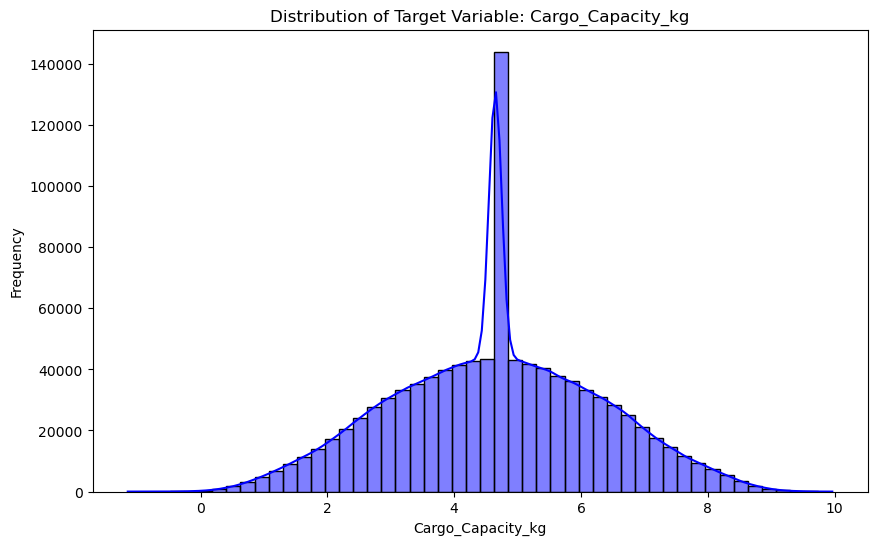

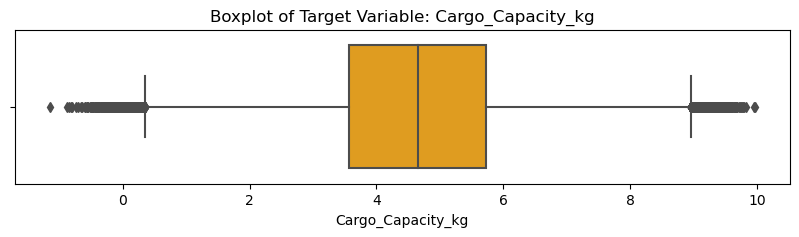


Outliers in the target variable:
823       9.010655
1182      9.103144
1242     -0.060267
1272      8.990428
2077     -0.281089
            ...   
997990    0.141698
998003    9.240004
998264    0.256830
998782    9.192077
999604    9.578900
Name: Cargo_Capacity_kg, Length: 2036, dtype: float64


In [20]:
# Statistical summary for the target variable
print("\n--- Target Variable Summary ---")
print(y.describe())

# Check for missing values in the target variable
print("\nMissing values in the target variable:", y.isnull().sum())

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True, color="blue")
plt.title("Distribution of Target Variable: Cargo_Capacity_kg")
plt.xlabel("Cargo_Capacity_kg")
plt.ylabel("Frequency")
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=y, color="orange")
plt.title("Boxplot of Target Variable: Cargo_Capacity_kg")
plt.show()

# Detect outliers using IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = y[(y < lower_bound) | (y > upper_bound)]
print("\nOutliers in the target variable:")
print(outliers)


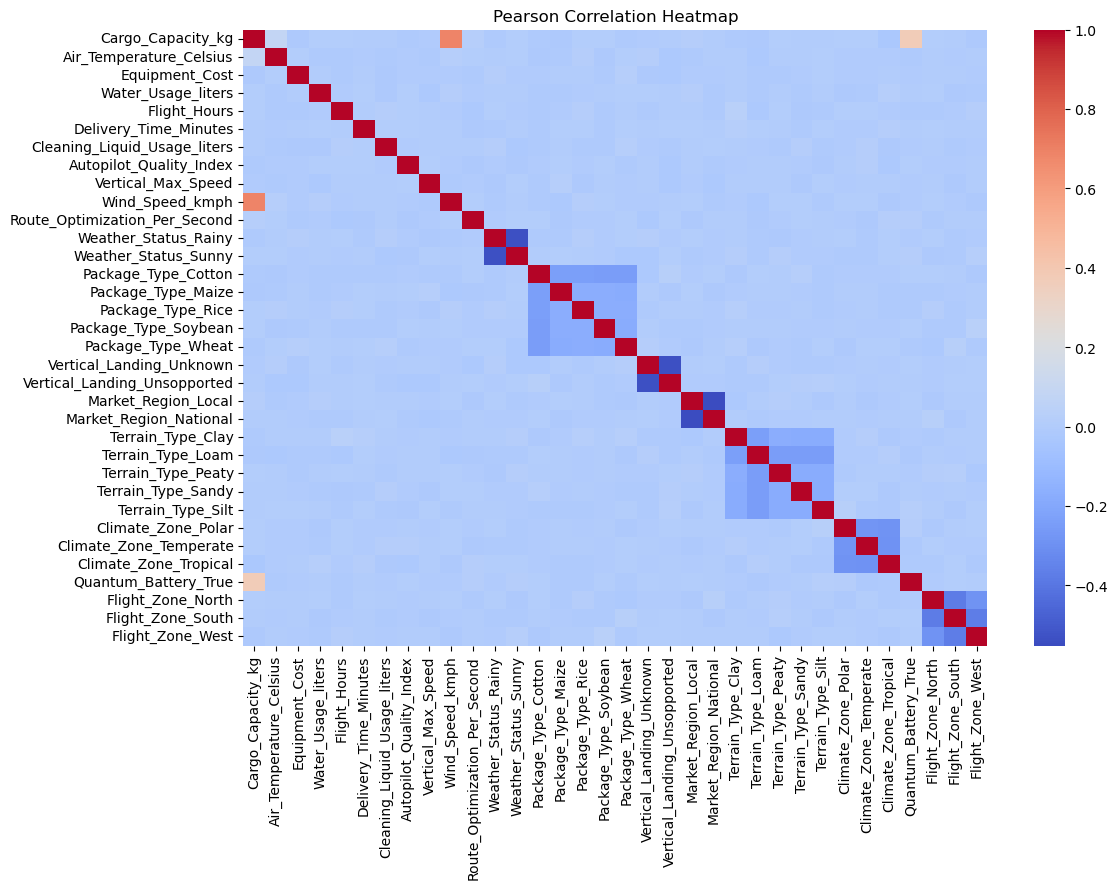

In [ ]:
import seaborn as sns
# Compute Pearson correlation matrix
pearson_corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, cmap="coolwarm", annot=False)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [15]:
#we found that the minimum for Water Usage is negative, 
#which is impossible therefore we consider them as errors and impute them with median

median_value = df['Water_Usage_liters'][df['Water_Usage_liters'] >= 0].median()
df['Water_Usage_liters'] = df['Water_Usage_liters'].apply(lambda x: median_value if x < 0 else x)

#an analogous case happened with Route_Optimization_Per_Second so we proceed as we did above

median_value = df['Route_Optimization_Per_Second'][df['Route_Optimization_Per_Second'] >= 0].median()
df['Route_Optimization_Per_Second'] = df['Route_Optimization_Per_Second'].apply(lambda x: median_value if x < 0 else x)

"""Some features (e.g., Route_Optimization_Per_Second, Wind_Speed_kmph, Equipment_Cost) have very large ranges,
which can affect model performance. Normalize or standardize these features:"""

from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Imputation and standardization completed")

Imputation and standardization completed


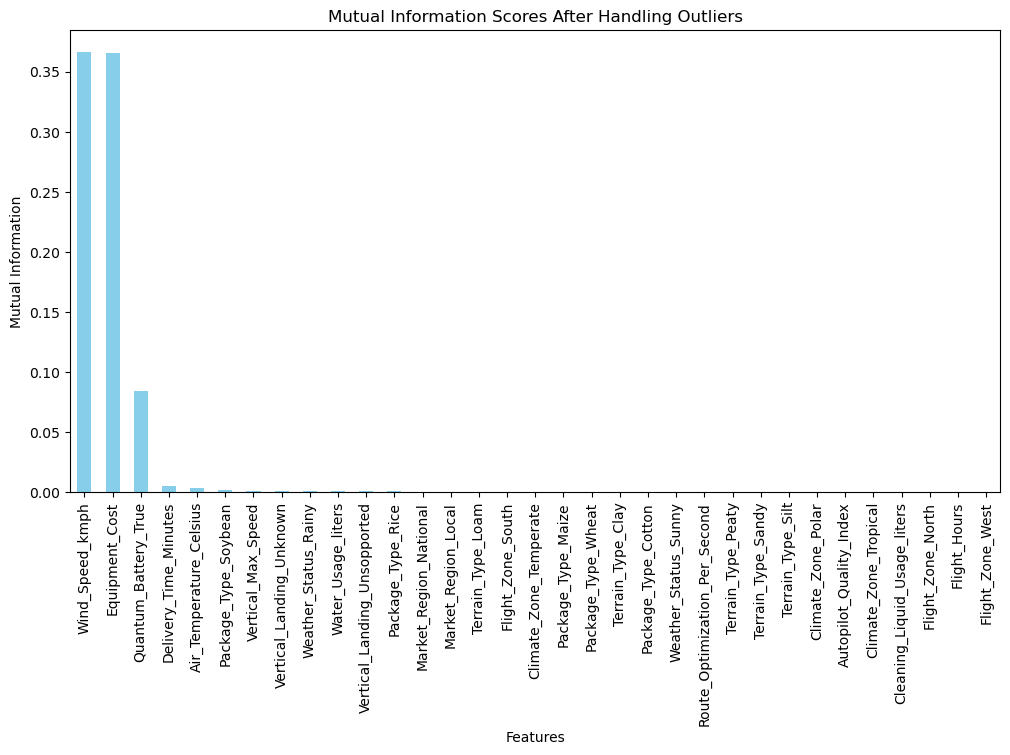

In [16]:
from sklearn.feature_selection import mutual_info_regression

X = df_encoded.drop('Cargo_Capacity_kg', axis=1)
y = df_encoded['Cargo_Capacity_kg']

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X.columns)
mi_scores_series.sort_values(ascending=False, inplace=True)

# Plot Mutual Information Scores
plt.figure(figsize=(12, 6))
mi_scores_series.plot(kind='bar', color='skyblue')
plt.title("Mutual Information Scores After Handling Outliers")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.show()

In [ ]:
#Drop Columns with mutual information scores equal to 0

# Identify columns with MI scores equal to 0
columns_to_drop = mi_scores_series[mi_scores_series == 0].index
print("Columns to drop due to MI score = 0:", columns_to_drop.tolist())

# Drop these columns from the DataFrame
X_filtered = X.drop(columns=columns_to_drop)

# Print the shape of the updated DataFrame
print("Shape of X before dropping:", X.shape)
print("Shape of X after dropping:", X_filtered.shape)

## [SECTION 2] Methods

Regression. Lorem Ipsum.

In [ ]:
#code

## [SECTION 3] Experimental Design

Metrics. Lorem Ipsum.

In [ ]:
#code

## [SECTION 4] Results

Lorem Ipsum.

In [ ]:
#code

## [SECTION 5] Conclusions

In [ ]:
#code